# Comparación con anotaciones

Vamos a comparar en esta notebook las predicciones de ChatGPT vs las anotaciones humanas


NOTA: Dejar para otro trabajo

In [8]:

%load_ext autoreload
%autoreload 2
from rioplatense_hs.openai import get_completion
import pandas as pd
import json
from glob import glob
from rioplatense_hs.preprocessing import labels

pd.options.display.max_colwidth = 1000
#df_train.loc[df_train["LGBTI"] > 0, ["title", "text", "text_label"]].sample(20)

files = {
    #"one-shot": sorted(glob("../data/test*pred*1shot.csv")),
    "gpt-3.5": sorted(glob("../../data/runs/test_*_chatgpt.csv")),
    "beto": sorted(glob("../../data/runs/test*beto.csv")),
    "aya": sorted(glob("../../data/runs/test*aya.csv")),
    "mixtral": sorted(glob("../../data/runs/test*mixtral.csv")),
}
assert len({len(value) for value in files.values()}) == 1

dfs = {k: pd.concat([pd.read_csv(f, index_col=0) for f in v]) for k, v in files.items()}

raw_dataset = json.load(open("../../data/dataset.raw.json"))


pred_labels = [f"PRED_{label}" for label in labels]
score_labels = [f"SCORE_{label}" for label in labels]

dfs["beto"][score_labels] = dfs["beto"][pred_labels]
dfs["beto"][pred_labels] = (dfs["beto"][pred_labels] > 0.5).astype(int)

# Me quedo sólo con los que tienen regionalismos



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
comments = [comment for article in raw_dataset for comment in article["comments"]]

df_raw = pd.DataFrame(comments).set_index("id")

df_raw.sample(10)

,text,article_id,annotators,HATEFUL,CALLS,WOMEN,LGBTI,RACISM,CLASS,POLITICS,DISABLED,APPEARANCE,CRIMINAL,tweet_id,user_id
id,,,,,,,,,,,,,,,
369172,@usuario Pensé que hablaban del pelo😄,1274294201342140416,"[annotator_2, annotator_1]",[],[],[],[],[],[],[],[],[],[],1274426872944828419,960959770361516034
370213,@usuario Te agarraron carniceros...,1272246814897389569,"[annotator_1, annotator_5]",[],[],[],[],[],[],[],[],[],[],1272264742489534464,1267410273557676032
340848,"@usuario YA NO ES ""CLARIN MIENTE"" AHORA ES:""CHINA MIENTE""",1245947401535467520,"[annotator_4, annotator_2, annotator_5]",[annotator_2],[],[],[],[annotator_2],[],[],[],[],[],1246145353486872580,1243724593073922048
351960,@usuario Qué culpa tendrán los murciélagos!? La culpa es de los orientales que se los comen!!,1301519808916344833,"[annotator_6, annotator_3, annotator_1]",[annotator_3],[],[],[],[annotator_3],[],[],[],[],[],1301534066207002624,569265480
395063,@usuario De educación ni hablar,1334635888366776320,"[annotator_2, annotator_6]",[],[],[],[],[],[],[],[],[],[],1334803204140380162,1306344037851553793
391973,"@usuario Pfizer, son negligentes pq son buitres, no les importa nadie solo vender....viva sputnik v",1357119232253788165,"[annotator_2, annotator_1]",[],[],[],[],[],[],[],[],[],[],1357122596689567749,436974176
373418,@usuario Si,1294980385907015680,"[annotator_5, annotator_1]",[],[],[],[],[],[],[],[],[],[],1295147322121355265,1033907870788734976
396454,@usuario Estanislao debe estar saltando en una pata!!!,1354380845876977664,"[annotator_6, annotator_1, annotator_5]",[annotator_1],[],[],[annotator_1],[],[],[],[],[],[],1354457502390382595,2842741036
390284,@usuario B A L A,1320012378239651842,"[annotator_2, annotator_1, annotator_6]","[annotator_2, annotator_1, annotator_6]","[annotator_2, annotator_1, annotator_6]",[],[],[],[],[],[],[],"[annotator_2, annotator_1, annotator_6]",1320021055864492035,1242513058251116547


In [10]:
df_raw

,text,article_id,annotators,HATEFUL,CALLS,WOMEN,LGBTI,RACISM,CLASS,POLITICS,DISABLED,APPEARANCE,CRIMINAL,tweet_id,user_id
id,,,,,,,,,,,,,,,
327916,@usuario Momento oportuno para hacer esa movida!!!!..ahora que la JUSTICIA está en veda sanitaria..!!!!..,1241486782178435072,"[annotator_5, annotator_2]",[],[],[],[],[],[],[],[],[],[],1241513939499876354,1173653523478851593
327917,"@usuario vienen medicos cubanos... ahhh pero no veo ninguna ayuda norteamericana, quienes ni siquiera les importa, seguro que ellos generaron esto, lacras de mierda",1241486782178435072,"[annotator_5, annotator_2, annotator_1]",[annotator_2],[],[],[],[annotator_2],[],[],[],[],[],1241524087773593600,2492207160
327918,@usuario Otros virus más?,1241486782178435072,"[annotator_5, annotator_2]",[],[],[],[],[],[],[],[],[],[],1241493802222850049,900774786736979969
327919,@usuario Quien diría q un día Cristina estaría libre y todos los argentinos en prision preventiva,1241486782178435072,"[annotator_5, annotator_2]",[],[],[],[],[],[],[],[],[],[],1241776452300869632,1218288879800811521
327920,"@usuario Ya que no devuelven TODO,es lo menos que tiene que hacer cuarentena cayadita la bocota!",1241486782178435072,"[annotator_5, annotator_2]",[],[],[],[],[],[],[],[],[],[],1241801967669776384,3144238919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407950,@usuario Nunca olvidar que este gobierno hizo liberar a 4600 presos,1357326733058461696,"[annotator_2, annotator_1]",[],[],[],[],[],[],[],[],[],[],1357362025203200002,147954815
407951,@usuario Esos pseudohumanos nos están matando lentamente. Hay que declararles la guerra.,1357326733058461696,"[annotator_2, annotator_1, annotator_6]",[annotator_2],[],[],[],[],[],[],[],[],[annotator_2],1357358187712757762,150045518
407952,"@usuario Que tristeza dios mio, que en paz descanse y mucha fuerza a su familia 👪",1357326733058461696,"[annotator_2, annotator_1]",[],[],[],[],[],[],[],[],[],[],1357528904228081664,615411644


In [13]:
for idx, row in dfs["gpt-3.5"].iterrows():
    assert idx in df_raw.index

Perfecto, están todos

In [14]:
from rioplatense_hs.preprocessing import text_to_label


columns = ["HATEFUL", "annotators"] + labels

# Apply len to each cell
df_raw_labels = (df_raw.loc[dfs["gpt-3.5"].index, columns].map(len) > 0).astype(int)

df_raw_labels

,HATEFUL,annotators,WOMEN,LGBTI,RACISM,CLASS,POLITICS,DISABLED,APPEARANCE,CRIMINAL
id,,,,,,,,,,
401109,1,1,0,0,0,0,1,0,0,0
396214,0,1,0,0,0,0,0,0,0,0
398849,0,1,0,0,0,0,0,0,0,0
398914,1,1,0,1,0,0,0,0,0,0
382020,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
406274,1,1,0,0,0,0,0,0,0,1
395737,0,1,0,0,0,0,0,0,0,0
365805,0,1,0,0,0,0,0,0,0,0


In [15]:
from sklearn.metrics import classification_report

pred_labels = [f"PRED_{label}" for label in labels]

gold_labels = df_raw_labels[labels]
preds = dfs["gpt-3.5"][pred_labels].astype(int)


print(classification_report(gold_labels, preds, target_names=labels))

              precision    recall  f1-score   support

       WOMEN       0.39      0.38      0.38       187
       LGBTI       0.64      0.52      0.57       151
      RACISM       0.62      0.58      0.60       358
       CLASS       0.34      0.44      0.38       119
    POLITICS       0.17      0.00      0.01       209
    DISABLED       0.00      0.00      0.00        83
  APPEARANCE       0.00      0.00      0.00       230
    CRIMINAL       0.00      0.00      0.00       269

   micro avg       0.51      0.25      0.34      1606
   macro avg       0.27      0.24      0.24      1606
weighted avg       0.29      0.25      0.26      1606
 samples avg       0.07      0.06      0.06      1606



/home/jmperez/projects/rioplatense_hate_speech/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jmperez/projects/rioplatense_hate_speech/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jmperez/projects/rioplatense_hate_speech/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
 

In [16]:
from sklearn.metrics import classification_report

pred_labels = [f"PRED_{label}" for label in labels]

gold_labels = df_raw_labels[labels]
preds = dfs["beto"][pred_labels].astype(int)


print(classification_report(gold_labels, preds, target_names=labels))

              precision    recall  f1-score   support

       WOMEN       0.64      0.26      0.37       187
       LGBTI       0.71      0.26      0.39       151
      RACISM       0.90      0.51      0.65       358
       CLASS       0.80      0.33      0.46       119
    POLITICS       0.85      0.38      0.52       209
    DISABLED       0.68      0.49      0.57        83
  APPEARANCE       0.87      0.64      0.74       230
    CRIMINAL       0.83      0.47      0.60       269

   micro avg       0.82      0.44      0.57      1606
   macro avg       0.79      0.42      0.54      1606
weighted avg       0.81      0.44      0.56      1606
 samples avg       0.11      0.11      0.11      1606



/home/jmperez/projects/rioplatense_hate_speech/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jmperez/projects/rioplatense_hate_speech/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Macro y Micro mejoran levemente, aunque el recall obviamente baja

## IAA con anotaciones

In [20]:
annotators = {x for annotators in df_raw["HATEFUL"].values for x in annotators}

In [21]:


def get_annotator_df(annotator):
    all_labels = ["HATEFUL"] + labels


    idx = df_raw["annotators"].map(lambda x: annotator in x)

    # Fill with na where idx is False

    df_annotator = df_raw.loc[idx].copy()

    # 0 if annotator is not in the cell, 1 if annotator is in the cell
    df_annotator.loc[idx, all_labels] = df_annotator.loc[idx, all_labels].map(lambda x: 1 if annotator in x else 0)

    return df_annotator

df_annotators = {annotator: get_annotator_df(annotator) for annotator in annotators}



In [22]:
ids = dfs["gpt-3.5"].index

# Create empty multi-index with labels and annotators, and ids as columns
df_annotations = pd.DataFrame(index=pd.MultiIndex.from_product([labels, annotators], names=["label", "annotator"]), columns=ids)

for annotator, df_annotator in df_annotators.items():
    for label in labels:
        df_annotations.loc[(label, annotator), df_annotator.index] = df_annotator[label].values


In [24]:
import krippendorff

for label in labels:
    alpha = krippendorff.alpha(df_annotations.loc[label].astype(float).values)

    print(f"Alpha {label:<12}: {alpha:.3f}")

Alpha WOMEN       : 0.531
Alpha LGBTI       : 0.555
Alpha RACISM      : 0.608
Alpha CLASS       : 0.404


In [25]:
## Measure agreement between pairs of annotators
from sklearn.metrics import cohen_kappa_score
from itertools import combinations

pairs = list(combinations(annotators, 2))

agreements = []

annotator_to_agreement = {annotator: [] for annotator in annotators}

for label in labels:
    print(f"Label: {label}")
    label_df = df_annotations.loc[label]
    for annotator1, annotator2 in pairs:
        cols = label_df.loc[annotator1].notna() & label_df.loc[annotator2].notna()

        # Cohen's kappa

        ann1_labels = label_df.loc[annotator1, cols].astype(float).values
        ann2_labels = label_df.loc[annotator2, cols].astype(float).values

        kappa = cohen_kappa_score(ann1_labels, ann2_labels)
        alpha = krippendorff.alpha(label_df.loc[[annotator1, annotator2], cols].astype(float).values)

        annotator_to_agreement[annotator1].append({"annotator": annotator2, "label": label, "alpha": alpha, "kappa": kappa})
        annotator_to_agreement[annotator2].append({"annotator": annotator1, "label": label, "alpha": alpha, "kappa": kappa})

        agreements.append({
            "annotator1": annotator1,
            "annotator2": annotator2,
            "label": label,
            "alpha": alpha,
            "kappa": kappa
        })


Label: WOMEN
Label: LGBTI
Label: RACISM
Label: CLASS


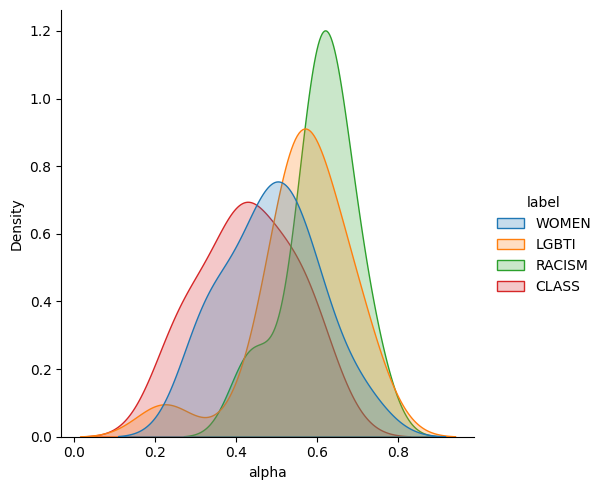

In [26]:
import seaborn as sns
df_alpha = pd.DataFrame(agreements)

# sns distplot


sns.displot(df_alpha, x="alpha", hue="label", kind="kde", fill=True)


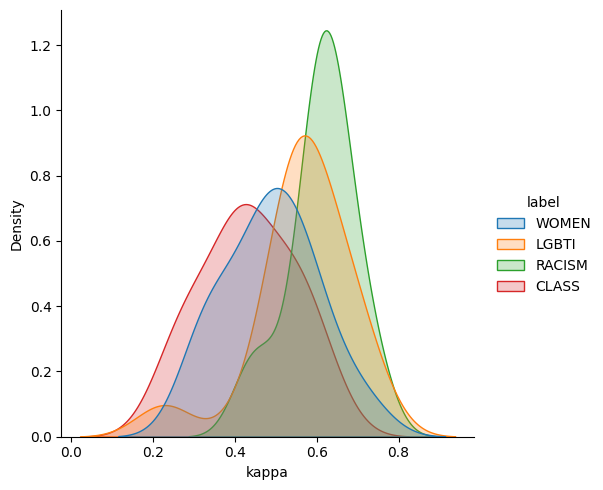

In [27]:
sns.displot(df_alpha, x="kappa", hue="label", kind="kde", fill=True)

In [28]:
# Get min by label

df_alpha.groupby("label")["alpha"].min(), df_alpha.groupby("label")["kappa"].min()

(label
 CLASS     0.233449
 LGBTI     0.222960
 RACISM    0.419165
 WOMEN     0.310043
 Name: alpha, dtype: float64,
 label
 CLASS     0.240255
 LGBTI     0.227422
 RACISM    0.429460
 WOMEN     0.313971
 Name: kappa, dtype: float64)

In [30]:
df_alpha.groupby("label")["alpha"].max(), df_alpha.groupby("label")["kappa"].max()

(label
 CLASS     0.623589
 LGBTI     0.731973
 RACISM    0.748909
 WOMEN     0.714324
 Name: alpha, dtype: float64,
 label
 CLASS     0.623713
 LGBTI     0.731896
 RACISM    0.749044
 WOMEN     0.714509
 Name: kappa, dtype: float64)

In [145]:
df_chatgpt = df[pred_labels]
df_chatgpt.columns = [x.replace("PRED_", "") for x in df_chatgpt.columns]

df_chatgpt

,WOMEN,LGBTI,RACISM,CLASS,POLITICS,DISABLED,APPEARANCE,CRIMINAL
id,,,,,,,,
339709,0,0,1,0,0,0,0,0
395003,0,0,0,0,1,0,0,0
381327,0,0,0,0,0,0,0,0
371979,0,0,0,0,0,0,0,0
342998,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
355445,0,0,0,0,0,0,0,0
360240,0,0,0,0,0,0,0,0
375158,0,0,0,0,0,0,0,0


In [154]:


chatgpt_agreements = []

for label in labels:
    print(f"Label: {label}")
    label_df = df_chatgpt[label]
    for annotator in annotators:

        annotator_labels = df_annotations.loc[(label, annotator)].loc[df_chatgpt.index]

        cols = annotator_labels.notna() & label_df.notna()

        num_labels = cols.sum()

        print(f"Annotator {annotator:<12}: labels: {cols.sum()}")
        # Cohen's kappa

        annotator_labels = annotator_labels[cols].astype(float).values
        chatgpt_labels = label_df[cols].astype(float).values

        kappa = cohen_kappa_score(annotator_labels, chatgpt_labels)

        chatgpt_agreements.append({
            "annotator": annotator,
            "label": label,
            "kappa": kappa,
            "n": num_labels,
        })



Label: WOMEN
Annotator annotator_2 : labels: 352
Annotator annotator_5 : labels: 329
Annotator annotator_1 : labels: 384
Annotator annotator_6 : labels: 331
Annotator annotator_3 : labels: 120
Annotator annotator_4 : labels: 62
Label: LGBTI
Annotator annotator_2 : labels: 352
Annotator annotator_5 : labels: 329
Annotator annotator_1 : labels: 384
Annotator annotator_6 : labels: 331
Annotator annotator_3 : labels: 120
Annotator annotator_4 : labels: 62
Label: RACISM
Annotator annotator_2 : labels: 352
Annotator annotator_5 : labels: 329
Annotator annotator_1 : labels: 384


/home/jmperez/projects/rioplatense_hate_speech/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:697: RuntimeWarning: invalid value encountered in scalar divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


Annotator annotator_6 : labels: 331
Annotator annotator_3 : labels: 120
Annotator annotator_4 : labels: 62
Label: CLASS
Annotator annotator_2 : labels: 352
Annotator annotator_5 : labels: 329
Annotator annotator_1 : labels: 384
Annotator annotator_6 : labels: 331
Annotator annotator_3 : labels: 120
Annotator annotator_4 : labels: 62
Label: POLITICS
Annotator annotator_2 : labels: 352
Annotator annotator_5 : labels: 329
Annotator annotator_1 : labels: 384
Annotator annotator_6 : labels: 331
Annotator annotator_3 : labels: 120
Annotator annotator_4 : labels: 62
Label: DISABLED
Annotator annotator_2 : labels: 352
Annotator annotator_5 : labels: 329
Annotator annotator_1 : labels: 384
Annotator annotator_6 : labels: 331
Annotator annotator_3 : labels: 120
Annotator annotator_4 : labels: 62
Label: APPEARANCE
Annotator annotator_2 : labels: 352
Annotator annotator_5 : labels: 329
Annotator annotator_1 : labels: 384
Annotator annotator_6 : labels: 331
Annotator annotator_3 : labels: 120
Annot

In [155]:
pd.DataFrame(chatgpt_agreements)

,annotator,label,kappa,n
0,annotator_2,WOMEN,0.343109,352
1,annotator_5,WOMEN,0.462216,329
2,annotator_1,WOMEN,0.602237,384
3,annotator_6,WOMEN,0.568111,331
4,annotator_3,WOMEN,-0.011236,120
5,annotator_4,WOMEN,-0.026490,62
6,annotator_2,LGBTI,0.506374,352
7,annotator_5,LGBTI,0.416408,329
8,annotator_1,LGBTI,0.625731,384
9,annotator_6,LGBTI,0.214842,331


In [156]:
chatgpt_agreements = pd.DataFrame(chatgpt_agreements)

max = chatgpt_agreements.groupby("label")["kappa"].max()

min = chatgpt_agreements.groupby("label")["kappa"].min()

mean = chatgpt_agreements.groupby("label")["kappa"].mean()

median = chatgpt_agreements.groupby("label")["kappa"].median()

print("Max")
print(max)
print("Min")
print(min)
print("Median")

print(median)


Max
label
APPEARANCE    0.473684
CLASS         0.398128
CRIMINAL      0.495027
DISABLED      1.000000
LGBTI         0.625731
POLITICS      0.367033
RACISM        0.783784
WOMEN         0.602237
Name: kappa, dtype: float64
Min
label
APPEARANCE   -0.026490
CLASS         0.000000
CRIMINAL      0.000000
DISABLED     -0.008122
LGBTI         0.214842
POLITICS     -0.016393
RACISM        0.452991
WOMEN        -0.026490
Name: kappa, dtype: float64
Median
label
APPEARANCE    0.213906
CLASS         0.196229
CRIMINAL      0.372168
DISABLED      0.106138
LGBTI         0.506374
POLITICS      0.284727
RACISM        0.673317
WOMEN         0.402662
Name: kappa, dtype: float64


In [163]:
chatgpt_agreements.groupby(["label"])["kappa"].max()

label
APPEARANCE    0.473684
CLASS         0.398128
CRIMINAL      0.495027
DISABLED      1.000000
LGBTI         0.625731
POLITICS      0.367033
RACISM        0.783784
WOMEN         0.602237
Name: kappa, dtype: float64

In [167]:
pd.DataFrame(annotator_to_agreement["annotator_2"]).groupby("label")["kappa"].median()

label
APPEARANCE    0.731845
CLASS         0.398388
CRIMINAL      0.546166
DISABLED      0.558329
LGBTI         0.529190
POLITICS      0.544939
RACISM        0.627973
WOMEN         0.510051
Name: kappa, dtype: float64